## <span style="color:orange">Techniques: </span>
- **Random Forest**
- **Decision tree**
- **Gaussian Naive Bayes**
- **K-Nearest Neighbours**

### <span style="color:purple">**Dataset: IRIS-Flowers Prediction**</span>

### <span style="color:red">Problem: **Classification**</span>

***

### <span style="color:cyan">Step: 00</span>: (Import Libraries)

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

### <span style="color:cyan">Step: 01</span>: (Import Dataset)

In [2]:
# import Dataset !

df = pd.read_csv('iris_flowers.csv')
df.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa


In [3]:
df = df.drop('Unnamed: 0', axis=1)
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


***

##### Missing Values

In [4]:
for feature in df:
    if df[feature].isnull().sum()>1:
        print(feature,":", np.round(df[feature].isnull().mean(),4),'%')
    
else:
     print("There is no Null Values")

There is no Null Values


In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

#### Numerical Features

In [6]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("The length of Numerical_values is :",len(numerical_features))
df[numerical_features].head()

The length of Numerical_values is : 4


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Discrete Variables 

In [7]:
discrete_Feature = [feature for feature in numerical_features if len(df[feature].unique())<25]

print("The Discrete feature is :",len(discrete_Feature))
discrete_Feature

The Discrete feature is : 2


['sepal_width', 'petal_width']

#### Continous Variables

In [8]:
continous_Feature = [feature for feature in numerical_features if feature not in discrete_Feature]

print("The Continous feature is :",len(continous_Feature))
continous_Feature

The Continous feature is : 2


['sepal_length', 'petal_length']

In [9]:
df[continous_Feature].head()

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


#### Categorical Features

In [10]:
categorical_feature = [feature for feature in df.columns if df[feature].dtypes =="O"]
print(len(categorical_feature))
categorical_feature

1


['species']

In [11]:
df[categorical_feature].head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


***

In [12]:
df.shape

(150, 5)

In [13]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [17]:
X = df.drop(['species'], axis=1)
y = df[['species']]

In [18]:
X.sample(5)

,sepal_length,sepal_width,petal_length,petal_width
29,4.7,3.2,1.6,0.2
55,5.7,2.8,4.5,1.3
11,4.8,3.4,1.6,0.2
27,5.2,3.5,1.5,0.2
105,7.6,3.0,6.6,2.1


In [19]:
y.sample(5)

,species
32,setosa
25,setosa
69,versicolor
136,virginica
79,versicolor


In [20]:
y['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

---

### <span style="color:cyan">Step: 02</span>: Data Engineering

#### Normalization (Plotting)

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


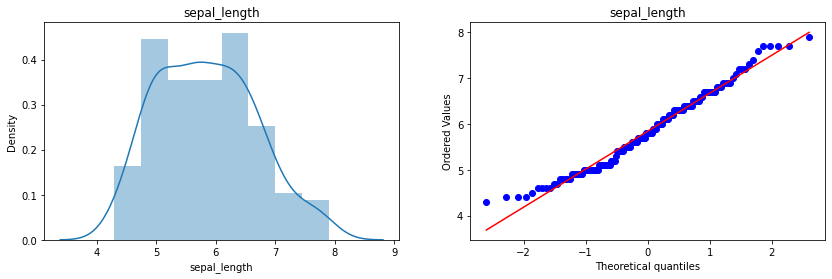

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


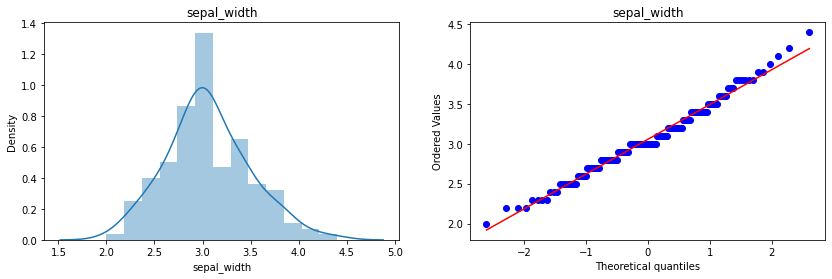

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


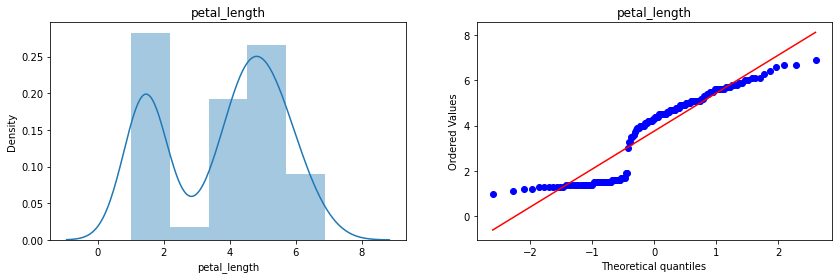

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


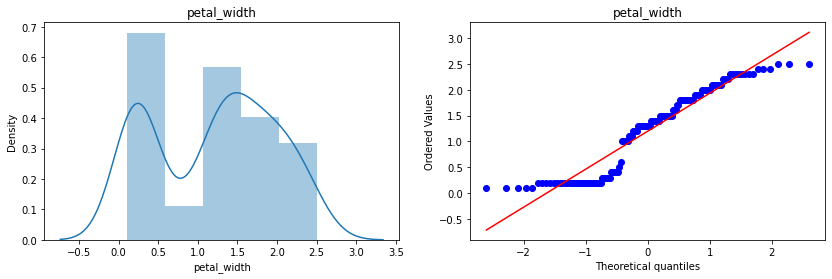

In [21]:
# Plotting the distplots without any transformation

for col in X.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

In [22]:
X.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [23]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

***

### Data Normalization

In [24]:
# transformation !

feature = X.columns
scaling = MinMaxScaler()
df[feature] = scaling.fit_transform(df[feature])
X = df[feature]
X.head(3)


,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667


***

### <span style="color:cyan">Step: 03</span>: Data Cleaned or Organize

In [25]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [26]:
print("Before Cleaning:", df.shape)

Before Cleaning: (150, 5)


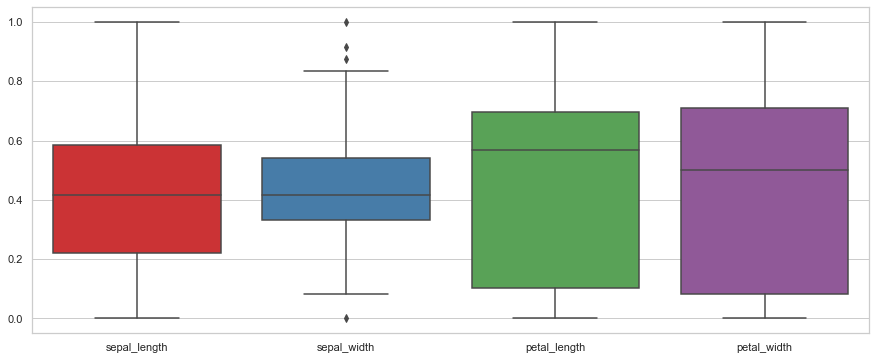

In [27]:
plt.figure(figsize=(15,6))
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=X,
            palette="Set1")
plt.show()            

***

Before Removing (sepal_width) outliers


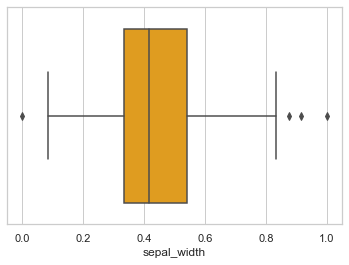

After Removing (sepal_width) outliers


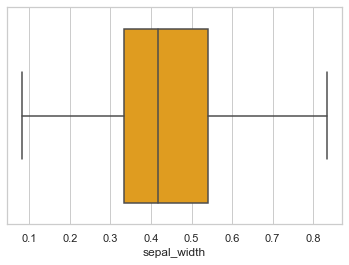

In [28]:
# sepal_width

print("Before Removing (sepal_width) outliers")
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            x="sepal_width",
            color="orange")
plt.show()  
           
df = df[df['sepal_width']<0.84] 
df = df[df['sepal_width']>0.01] 


print("After Removing (sepal_width) outliers")
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            x="sepal_width",
            color="orange")
plt.show()  

In [29]:
print("Shape:", df.shape)

Shape: (146, 5)


***

In [30]:
print("After Cleaning:", df.shape)

After Cleaning: (146, 5)


After Removing Outliers


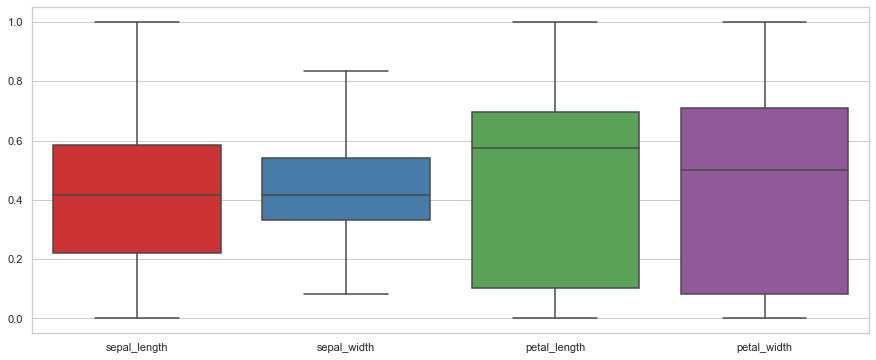

In [31]:
print("After Removing Outliers")
plt.figure(figsize=(15,6))
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            palette="Set1")
plt.show()            

***

## **Model Building**

### <span style="color:cyan">Step: 04</span>: Splitting Dataset into (Training and Testing) Data 

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***

### <span style="color:cyan">Step: 05</span>: Apply Techniques !

In [33]:
# DecisionTreeClassifier

dt_model = DecisionTreeClassifier().fit(X_train, y_train)
dt_model

DecisionTreeClassifier()

In [34]:
# RandomForestClassifier

rf_model = RandomForestClassifier().fit(X_train, y_train)
rf_model

C:\Users\fahad\AppData\Local\Temp\ipykernel_3120\261485189.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model = RandomForestClassifier().fit(X_train, y_train)


RandomForestClassifier()

In [35]:
# GaussianNaiveBayes

gnb_model = GaussianNB().fit(X_train, y_train)
gnb_model

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [36]:
# KNeighborsClassifier

knn_model = KNeighborsClassifier().fit(X_train, y_train)
knn_model

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [37]:
# LogisticRegression

lr_model = LogisticRegression().fit(X_train, y_train)
lr_model

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

### <span style="color:cyan">Step: 05</span>: Evaluate or Test Model Accuracy

In [38]:
y_pred_dt = dt_model.predict(X_test)
y_pred_dt

# Decision tree
dt_score = np.round(accuracy_score(y_test, y_pred_dt)*100, 3)
print("Decision tree:", dt_score)

Decision tree: 100.0


In [39]:
y_pred_rf = rf_model.predict(X_test)
y_pred_rf

# Random forest
rf_score = np.round(accuracy_score(y_test, y_pred_rf)*100, 3)
print("Random forest:", rf_score)

Random forest: 100.0


In [40]:
y_pred_gnb = gnb_model.predict(X_test)
y_pred_gnb

# Gussian Naive Bays
gnb_score = np.round(accuracy_score(y_test, y_pred_gnb)*100, 3)
print("GussianNB:", gnb_score)

GussianNB: 100.0


In [41]:
y_pred_knn = knn_model.predict(X_test)
y_pred_knn

# K_Nearest Neighbours 
knn_score = np.round(accuracy_score(y_test, y_pred_knn)*100, 3)
print("KNN:", knn_score)

KNN: 100.0


In [42]:
y_pred_lr = lr_model.predict(X_test)
y_pred_lr

# Logistic Regression 
lr_score = np.round(accuracy_score(y_test, y_pred_lr)*100, 3)
print("Logistic Regression:", lr_score)

Logistic Regression: 96.667


###  Compare the Results of Techniques !

In [43]:
data={'Decision tree'            :[dt_score],
      'Random Forest'            :[rf_score],
      'Gaussian_NB'              :[gnb_score],
      'KNN'                      :[knn_score],
      'Logistic Regression'      :[lr_score]
}

In [44]:
Evaluation = pd.DataFrame(data, index=['Score'])
Evaluation

,Decision tree,Random Forest,Gaussian_NB,KNN,Logistic Regression
Score,100.0,100.0,100.0,100.0,96.667


***

### **Apply Cross Validation** !

***

In [45]:
rf_validate = np.round(cross_val_score(rf_model, X, y, cv=5, scoring='accuracy').mean()*100, 3)
print("After cross validation of RF:", rf_validate)

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed

After cross validation of RF: 96.0


In [46]:
data={'Random Forest'            :[rf_score],
      'Cross-validate RF'        :[rf_validate]
}

In [47]:
Evaluation = pd.DataFrame(data, index=['Score'])
Evaluation

,Random Forest,Cross-validate RF
Score,100.0,96.0


***

In [48]:
dt_validate = np.round(cross_val_score(dt_model, X, y, cv=5, scoring='accuracy').mean()*100, 3)
print("After cross validation of DT:", dt_validate)

After cross validation of DT: 96.667


***

In [49]:
data1={'Decision tree'            :[dt_score],
      'Cross-validate DT'        :[dt_validate]
}

In [50]:
Evaluation = pd.DataFrame(data1, index=['Score'])
Evaluation

,Decision tree,Cross-validate DT
Score,100.0,96.667


***

In [51]:
gnb_validate = np.round(cross_val_score(gnb_model, X, y, cv=5, scoring='accuracy').mean()*100, 3)
print("After cross validation of GNB:", gnb_validate)

After cross validation of GNB: 95.333


C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

***

In [52]:
data2={'Gaussian Naive Bayes'             :[gnb_score],
      'Cross-validate GNB'                :[gnb_validate]
}

In [53]:
Evaluation = pd.DataFrame(data2, index=['Score'])
Evaluation

,Gaussian Naive Bayes,Cross-validate GNB
Score,100.0,95.333


***

In [54]:
knn_validate = np.round(cross_val_score(knn_model, X, y, cv=5, scoring='accuracy').mean()*100, 3)
print("After cross validation of KNN:", knn_validate)

After cross validation of KNN: 96.0


C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

***

In [55]:
data3={'K-Nearest Neighbours'             :[knn_score],
      'Cross-validate KNN'                :[knn_validate]
}

In [56]:
Evaluation = pd.DataFrame(data3, index=['Score'])
Evaluation

,K-Nearest Neighbours,Cross-validate KNN
Score,100.0,96.0


***

In [57]:
lr_validate = np.round(cross_val_score(lr_model, X, y, cv=5, scoring='accuracy').mean()*100, 3)
print("After cross validation of LR:", lr_validate)

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


After cross validation of LR: 92.667


C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

***

In [58]:
data4={'Logistic Regression'              :[lr_score],
      'Cross-validate LR'                 :[lr_validate]
}

In [59]:
Evaluation = pd.DataFrame(data4, index=['Score'])
Evaluation

,Logistic Regression,Cross-validate LR
Score,96.667,92.667


***

***

***